In [28]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.pipeline import Pipeline

In [29]:
df=pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [30]:
df.shape

(1025, 14)

In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='chol'>

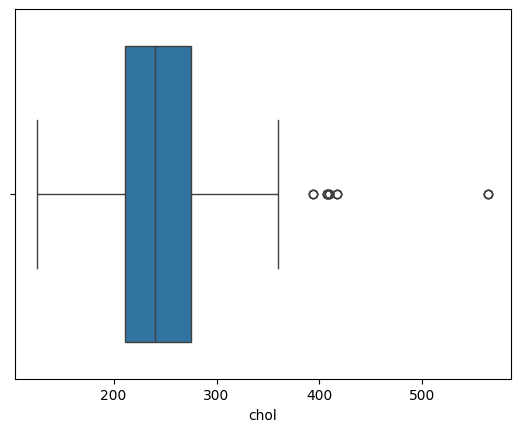

In [33]:
sns.boxplot(x='chol',data=df)

<Axes: xlabel='age'>

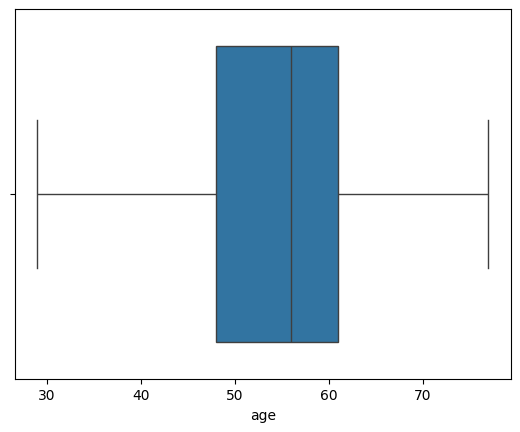

In [34]:
sns.boxplot(x='age',data=df)

In [35]:
q1=df['chol'].quantile(0.25)
q3=df['chol'].quantile(0.75)
iqr=q3-q1

In [36]:
max_range=q3+(1.5*iqr)
min_range=q1-(1.5*iqr)
max_range,min_range

(371.0, 115.0)

In [37]:
df=df[(df['chol']>=min_range) & (df['chol']<=max_range)]

In [38]:
df.shape

(1009, 14)

In [39]:
colname=df.columns.tolist()
print(colname)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [40]:
for col in colname:
    values=df[col].value_counts()
    print(values)

age
58    68
57    57
54    53
59    46
52    43
51    39
60    37
44    36
56    36
62    34
64    34
41    32
61    31
55    30
67    28
63    28
43    26
42    26
53    26
45    25
66    25
65    24
46    23
48    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
40    11
71    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
sex
1    713
0    296
Name: count, dtype: int64
cp
0    487
2    278
1    167
3     77
Name: count, dtype: int64
trestbps
120    128
130    123
140    101
110     64
150     51
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
152     17
145     17
170     15
122     14
100     14
134     14
136     11
126     10
180     10
142      9
105      9
146      8
94       7
178      7
148      7
144      6
102      6
115      6
117      4
165      4
200      4
154      4
114      4
123      4
192      3
106      3
104      3
129      3
174   

<Axes: xlabel='oldpeak'>

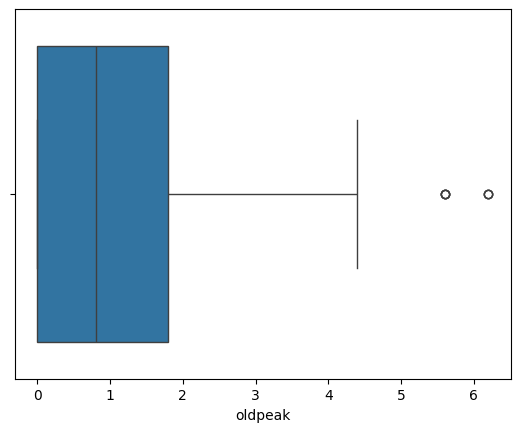

In [41]:
sns.boxplot(x="oldpeak",data=df)

<Axes: ylabel='trestbps'>

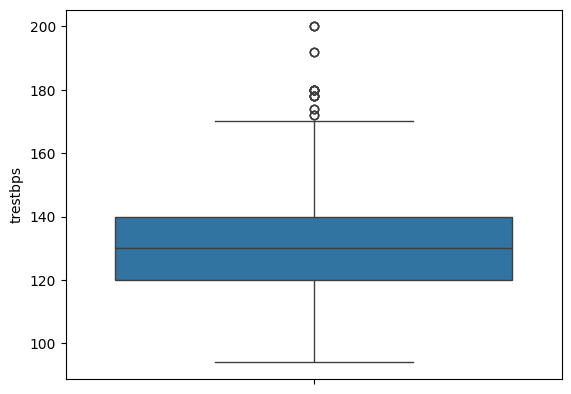

In [42]:
sns.boxplot(df['trestbps'])

In [43]:
q1=df['trestbps'].quantile(0.25)
q3=df['trestbps'].quantile(0.75)
iqr=q3-q1

In [44]:
max_range=q3+(1.5*iqr)
min_range=q1-(1.5*iqr)
df=df[(df['trestbps']>=min_range) & (df['trestbps']<=max_range)]

In [45]:
df.shape

(979, 14)

In [46]:
q1=df['oldpeak'].quantile(0.25)
q3=df['oldpeak'].quantile(0.75)
iqr=q3-q1
max_range=q3+(1.5*iqr)
min_range=q1-(1.5*iqr)
df=df[(df['oldpeak']>=min_range) & (df['oldpeak']<=max_range)]

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [48]:
X=df.drop(columns='target')
y=df['target']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance = sorted(zip(importances, feature_names), reverse=True)
print(feature_importance)

[(0.13194307647312115, 'cp'), (0.12561797919006473, 'thalach'), (0.1210383654337064, 'ca'), (0.11446438093796907, 'oldpeak'), (0.09980535871127, 'thal'), (0.08674624494682981, 'age'), (0.08138577634324673, 'chol'), (0.0691510893458363, 'trestbps'), (0.05895065448853711, 'exang'), (0.047999719776067436, 'slope'), (0.03249289506626738, 'sex'), (0.01999681754464662, 'restecg'), (0.010407641742437215, 'fbs')]


In [51]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [52]:
from sklearn.svm import SVC
model=SVC(random_state=42,kernel="poly",gamma=1,C=0.5)
model.fit(X_train,y_train)

SVC(C=0.5, gamma=1, kernel='poly', random_state=42)

In [53]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[91  0]
 [ 3 99]]
0.9844559585492227


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)



Best Parameters: {'C': 0.5, 'gamma': 1, 'kernel': 'poly'}
Best Score: 0.9883284457478005


In [55]:
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)
print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)

Training Accuracy: 1.0
Testing Accuracy: 0.9844559585492227


In [59]:
heart_disease_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Model
])

In [60]:
heart_disease_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [61]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

with open('heart_rf.pkl', 'wb') as model_file:
    pickle.dump({'model': rf_classifier}, model_file)